## Experiments: Comparing RSAST with other methods

In [1]:
# Import the os module
import os

path = 'c:\\Users\\Nicolas R\\random_sast'

try:
    os.chdir(path)
    print("Current working directory: {0}".format(os.getcwd()))
except FileNotFoundError:
    print("Directory: {0} does not exist".format(path))
except NotADirectoryError:
    print("{0} is not a directory".format(path))
except PermissionError:
    print("You do not have permissions to change to {0}".format(path))


Current working directory: c:\Users\Nicolas R\random_sast


In [47]:
from sast.sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sast.utils_sast import delete_files_in_directory
from cd_diagram.cd_function import *

### Reading Datasets

In [3]:

# Set directory where the csv files are located
directory = os.getcwd()+'/ExperimentationRSAST/results_other_methods/results_by_classifier'

# Create an empty list to store the dataframes
dfs = []

header=['dataset']
res = [str(ele) for ele in range(30)]
header.extend(res)

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath, names=header,index_col=False)

        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)


# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)

#10 Resampling
res=res[:10]

df_other_methods["avg"]=df_other_methods[res].mean(axis=1)

df_other_methods=df_other_methods[['filename','dataset','avg']]
df_other_methods['method']=df_other_methods['filename'].str.split('.').str[0]+"_UCR_10RES"
df_other_methods
df_other_methods=df_other_methods.rename(columns={'avg':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]


C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_8624\4288461203.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath, names=header,index_col=False)
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_8624\4288461203.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath, names=header,index_col=False)
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_8624\4288461203.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath, names=header,index_col=False)
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_8624\4288461203.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath, names=header,index

In [4]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ExperimentationRSAST/results_other_methods/results_summarized/UCR_ARCHIVE_singleTrainTest_ALL_METHODS_MOD.csv'

df = pd.read_csv(filepath)
df = df.melt(id_vars=["Unnamed: 0"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Unnamed: 0':'dataset'})
df['method'] = df['method']+"_UCR_TRAIN_TEST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [6]:
# Set directory where the csv files are located
"""
filepath = os.getcwd()+'/ExperimentationRSAST/ResultsSummarized/UCR_ARCHIVE_100RESAMPLES_ALL_METHODS_MOD.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Unnamed: 0"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Unnamed: 0':'dataset'})
df['method'] = df['method']+"_UCR_AVG_100RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])
"""

'\nfilepath = os.getcwd()+\'/ExperimentationRSAST/ResultsSummarized/UCR_ARCHIVE_100RESAMPLES_ALL_METHODS_MOD.csv\'\ndf = pd.read_csv(filepath)\ndf = df.melt(id_vars=["Unnamed: 0"], \n        var_name="method", \n        value_name="score")\ndf = df.rename(columns={\'Unnamed: 0\':\'dataset\'})\ndf[\'method\'] = df[\'method\']+"_UCR_AVG_100RES"\ndf=df[[\'dataset\',\'score\',\'method\']]\ndf_other_methods=pd.concat([df_other_methods,df])\n'

In [7]:

# Set directory where the csv files are located
#df_other_methods=df_other_methods[df_other_methods.method!="STC"]
filepath = os.getcwd()+'/ExperimentationRSAST/results_other_methods/results_summarized/SAST_PAPER_singleTrainTest_SAST_ST.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','STC':'score'})
df['method']="STC_PAPERSAST_TRAIN_TEST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])



In [8]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ExperimentationRSAST/results_other_methods/results_summarized/SAST_PAPER_singleTrainTest_SAST_ST.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','0':'score'})
df['method']="SAST_PAPERSAST_TRAIN_TEST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])

In [9]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ExperimentationRSAST/results_other_methods/results_summarized/ROCKET_PAPER_10RESAMPLES_BAKE_OFF.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Dataset"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Dataset':'dataset'})
df['method'] = df['method']+"_PAPERROCKET_AVG_10RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [10]:
# Set directory where the csv files are located


filepath = os.getcwd()+'/ExperimentationRSAST/results_other_methods/results_summarized/ROCKET_PAPER_10RESAMPLES_2018_DS.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Dataset"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Dataset':'dataset'})
df['method'] = df['method']+"_PAPERROCKET_AVG_10RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [11]:
# Set directory where the csv files are located


filepath = os.getcwd()+'/ExperimentationRSAST/results_other_methods/results_summarized/RDST_PAPER_30RESAMPLES_ALL_METHODS.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["dataset_name"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'dataset_name':'dataset'})
df['method'] = df['method']+"_PAPERRDST_AVG_30RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [12]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ExperimentationRSAST/results_other_methods/results_summarized/RDST_PAPER_30RESAMPLES_RDST.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'dataset':'dataset','acc_mean':'score','model':'method'})
df['method'] = df['method']+"_PAPERRDST_AVG_30RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [13]:

# Set directory where the csv files are located
directory = os.getcwd()+'/ExperimentationRSAST/results_other_methods/results_summarized/Server17_Comparison_Other_Methods_singleTrainTest'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df = pd.concat(dfs, ignore_index=True)
df=df[['dataset_name','classifier_name','accuracy']]

df=pd.pivot_table(df, index=['dataset_name','classifier_name'],aggfunc='mean').reset_index()
df['method']=df['classifier_name'].str.split('_').str[0]+"_RSAST_TRAIN_TEST"
df=df.rename(columns={'dataset_name':'dataset','accuracy':'score'})

df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [14]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ExperimentationRSAST/results_other_methods/results_summarized/Server17_Comparison_Other_Methods_Resampling'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df = pd.concat(dfs, ignore_index=True)
df=df[['dataset_name','classifier_name','accuracy']]

df=pd.pivot_table(df, index=['dataset_name','classifier_name'],aggfunc='mean').reset_index()
df['method']=df['classifier_name'].str.split('_').str[0]+"_RSAST_10RES"
df=df.rename(columns={'dataset_name':'dataset','accuracy':'score'})

df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [15]:
# Set directory where the RSAST result csv files are located

directories=[]
default_split_acfandpacf_k_1_10_sast=False
default_split_acfandpacf_k_1_10_notsast=False
default_split_all_k_1_10=False
default_split_all_acfandpacf_k_30_50=False
default_split_maxpacf_none_k_30_50=False
default_split_all_acfandpacf=False
default_split_all_acfandpacf_maxpacf_none_maxacf_k_1_50_p_1_100=False

resampling_acfandpacf_k_1_10_sast=True

if default_split_acfandpacf_k_1_10_sast:
    directories.append(os.getcwd()+'/ExperimentationRSAST/results_rsast/Server17_Comparison_RSAST')
if default_split_acfandpacf_k_1_10_notsast:
    directories.append(os.getcwd()+'/ExperimentationRSAST/results_rsast/Server17_not_used_sast')
if default_split_all_k_1_10:
    directories.append(os.getcwd()+'/ExperimentationRSAST/results_rsast/Server17_Comparison_RSAST_All')   
if default_split_all_acfandpacf_k_30_50:
    directories.append(os.getcwd()+'/ExperimentationRSAST/results_rsast/Server17_Comparison_RSAST_Extra_1')    
if default_split_maxpacf_none_k_30_50:
    directories.append(os.getcwd()+'/ExperimentationRSAST/results_rsast/Server17_Comparison_RSAST_Extra_2')    
if resampling_acfandpacf_k_1_10_sast:
    directories.append(os.getcwd()+'/ExperimentationRSAST/results_rsast/Server17_Resampling_Comparison_RSAST')     
if default_split_all_acfandpacf_maxpacf_none_maxacf_k_1_50_p_1_100:
    directories.append(os.getcwd()+'/ExperimentationRSAST/results_rsast/Server16_Hyperparameter_Tunning')
    directories.append(os.getcwd()+'/ExperimentationRSAST/results_rsast/Server17_Hyperparameter_Tunning')


# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_all_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            df['directory']=directory
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)


C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_8624\524691405.py:46: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_8624\524691405.py:47: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_8624\524691405.py:46: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_8624\524691405.py:47: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace(

In [16]:
hyperparameter='ACF&PACF: n_random_points=10 nb_inst_per_class=10'

In [17]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time']]
df_result=df_result[df_result["classifier_name"]==hyperparameter]
df_result['classifier_name'].replace(hyperparameter,"RSAST",inplace=True)
hyperparameter="RSAST"
df_result.dataset_name.unique()

array(['ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY',
       'AllGestureWiimoteZ', 'ArrowHead', 'Beef', 'BeetleFly',
       'BirdChicken', 'BME', 'Car', 'CBF', 'Chinatown',
       'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers',
       'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction',
       'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect',
       'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame',
       'DodgerLoopWeekend', 'Earthquakes', 'ECG200', 'ECG5000',
       'ECGFiveDays', 'ElectricDevices', 'EOGHorizontalSignal',
       'EOGVerticalSignal', 'EthanolLevel', 'FaceAll', 'FaceFour',
       'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB',
       'FreezerRegularTrain', 'FreezerSmallTrain', 'Fungi',
       'GestureMidAirD1', 'GestureMidAirD2', 'GestureMidAirD3',
       'GesturePebbleZ1', 'GesturePebbleZ2', 'GunPoint',
       'GunPointAgeSpan', 'GunPointMaleVersusFemale',
       'GunPointOldVersusYoung', 'Ham', 'HandOu

In [18]:
len(df_result.dataset_name.unique())

63

In [19]:
df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods.classifier_name.unique()

array(['BoP_UCR_10RES', 'BOSS_UCR_10RES', 'CID_DTW_UCR_10RES',
       'DDTW_UCR_10RES', 'DD_DTW_UCR_10RES', 'DTD_C_UCR_10RES',
       'DTW_F_UCR_10RES', 'EE_UCR_10RES', 'Flat-COTE_UCR_10RES',
       'FS_UCR_10RES', 'HIVE-COTE_UCR_10RES', 'LPS_UCR_10RES',
       'LS_UCR_10RES', 'MSM_UCR_10RES', 'RotF_UCR_10RES',
       'SAXVSM_UCR_10RES', 'ST_UCR_10RES', 'TSBF_UCR_10RES',
       'TSF_UCR_10RES', 'TWE_UCR_10RES', 'WDTW_UCR_10RES',
       'NB_UCR_TRAIN_TEST', 'C45_UCR_TRAIN_TEST', 'SVML_UCR_TRAIN_TEST',
       'SVMQ_UCR_TRAIN_TEST', 'BN_UCR_TRAIN_TEST', 'RandF_UCR_TRAIN_TEST',
       'RotF_UCR_TRAIN_TEST', 'MLP_UCR_TRAIN_TEST',
       'Euclidean_1NN_UCR_TRAIN_TEST', 'DTW_R1_1NN_UCR_TRAIN_TEST',
       'DTW_Rn_1NN_UCR_TRAIN_TEST', 'DDTW_R1_1NN_UCR_TRAIN_TEST',
       'DDTW_Rn_1NN_UCR_TRAIN_TEST', 'ERP_1NN_UCR_TRAIN_TEST',
       'LCSS_1NN_UCR_TRAIN_TEST', 'MSM_1NN_UCR_TRAIN_TEST',
       'TWE_1NN_UCR_TRAIN_TEST', 'WDDTW_1NN_UCR_TRAIN_TEST',
       'WDTW_1NN_UCR_TRAIN_TEST', 'DD_DTW_UCR_TRA

In [20]:

#Comparison RSAST, SAST and STC (No resampling)
df_other_methods=df_other_methods[df_other_methods['classifier_name'].isin(['ST_UCR_TRAIN_TEST','SAST_PAPERSAST_TRAIN_TEST','DTW_R1_1NN_UCR_TRAIN_TEST'])]
#Comparison RSAST and Shapelet Methods (10 resampling)
#df_other_methods=df_other_methods[df_other_methods['classifier_name'].isin(['R_DST_PAPERRDST_AVG_30RES','FS_UCR_RES_10', 'LS_UCR_RES_10','DTW_R1_1NN_UCR_TRAIN_TEST'])]
#Comparison RSAST and Other Categories (distance, interval, dictionary)(10 resampling)
#df_other_methods=df_other_methods[df_other_methods['classifier_name'].isin(['EE_UCR_RES_10', 'TSBF_UCR_RES_10','BOSS_UCR_RES_10','DTW_R1_1NN_UCR_TRAIN_TEST'])]
#Comparison RSAST and SOTA methods(10 resampling)
#df_other_methods=df_other_methods[df_other_methods['classifier_name'].isin(['Rocket_PAPERROCKET_AVG_10RES','HCTE_PAPERROCKET_AVG_10RES','CHIEF_PAPERROCKET_AVG_10RES','DTW_R1_1NN_UCR_TRAIN_TEST'])]

#df_other_methods=df_other_methods[df_other_methods['classifier_name'].isin(['RDST_RSAST_10RES','Rocket_RSAST_10RES','Rocket_PAPERROCKET_AVG_10RES','HIVE-COTE_UCR_10RES','HCTE_PAPERROCKET_AVG_10RES'])]
df_other_methods['classifier_name'].unique()

array(['DTW_R1_1NN_UCR_TRAIN_TEST', 'ST_UCR_TRAIN_TEST',
       'SAST_PAPERSAST_TRAIN_TEST'], dtype=object)

In [21]:

df_other_methods['classifier_name'].replace("DTW_R1_1NN_UCR_TRAIN_TEST","1NN-DTW",inplace=True)
df_other_methods['classifier_name'].replace("RotF_UCR_TRAIN_TEST","RotF",inplace=True)
df_other_methods['classifier_name'].replace("ST_UCR_TRAIN_TEST","STC",inplace=True)
df_other_methods['classifier_name'].replace("SAST_PAPERSAST_TRAIN_TEST","SAST",inplace=True)
df_other_methods['classifier_name'].replace("FS_UCR_TRAIN_TEST","FS",inplace=True)
df_other_methods['classifier_name'].replace("LS_UCR_TRAIN_TEST","LS",inplace=True)
df_other_methods['classifier_name'].replace("BOSS_UCR_TRAIN_TEST","BOSS",inplace=True)
df_other_methods['classifier_name'].replace("TSBF_UCR_TRAIN_TEST","TSBF",inplace=True)
df_other_methods['classifier_name'].replace("EE_UCR_TRAIN_TEST","EE",inplace=True)
df_other_methods['classifier_name'].replace("HIVE-COTE_UCR_TRAIN_TEST","HIVE-COTE",inplace=True)
df_other_methods['classifier_name'].replace("Rocket_RSAST_TRAIN_TEST","ROCKET",inplace=True)
df_other_methods['classifier_name'].replace("TSBF_UCR_TRAIN_TEST","TSBF",inplace=True)
df_other_methods['classifier_name'].replace("ResNet_PAPERROCKET_AVG_10RES","ResNet",inplace=True)
df_other_methods['classifier_name'].replace("HCTE_PAPERROCKET_AVG_10RES","HIVE-COTE",inplace=True)
df_other_methods['classifier_name'].replace("ITime_PAPERROCKET_AVG_10RES","InceptionTime",inplace=True)
df_other_methods['classifier_name'].replace("CHIEF_PAPERROCKET_AVG_10RES","TS-CHIEF",inplace=True)
df_other_methods['classifier_name'].replace("Rocket_PAPERROCKET_AVG_10RES","ROCKET",inplace=True)
df_other_methods['classifier_name'].replace("BOSS_PAPERROCKET_AVG_10RES","BOSS",inplace=True)
df_other_methods['classifier_name'].replace("ST_PAPERROCKET_AVG_10RES","ST",inplace=True)
df_other_methods['classifier_name'].replace("R_DST_PAPERRDST_AVG_30RES","RDST",inplace=True)
df_other_methods['classifier_name'].replace("FS_UCR_RES_10","FS",inplace=True)
df_other_methods['classifier_name'].replace("LS_UCR_RES_10","LS",inplace=True)
df_other_methods['classifier_name'].replace("BOSS_UCR_RES_10","BOSS",inplace=True)
df_other_methods['classifier_name'].replace("EE_UCR_RES_10","EE",inplace=True)
df_other_methods['classifier_name'].replace("TSBF_UCR_RES_10","TSBF",inplace=True)
df_other_methods['classifier_name'].replace("RDST_RSAST_10RES","RDST",inplace=True)
df_other_methods['classifier_name'].replace("Rocket_RSAST_10RES","ROCKET",inplace=True)


In [22]:
df_other_methods['classifier_name'].unique()

array(['1NN-DTW', 'STC', 'SAST'], dtype=object)

In [23]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)


In [24]:
concatenated_df['classifier_name'].unique()

array(['1NN-DTW', 'STC', 'SAST', 'RSAST'], dtype=object)

In [25]:
len(concatenated_df.dataset_name.unique())

116

### Overall analysis

#### Accuracy: RSAST vs Other methods

C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_8624\4023233834.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


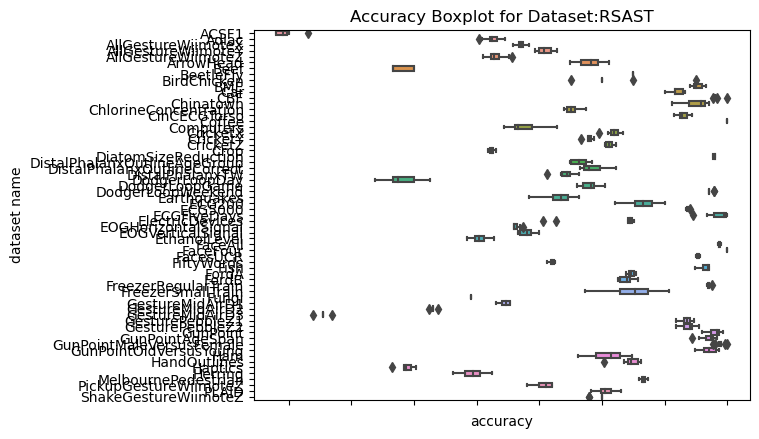

In [27]:
max_bx=max(df_result.accuracy)
min_bx=min(df_result.accuracy)



# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=df_result, y='dataset_name', x='accuracy')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

# save plot
plt.savefig('ExperimentationRSAST/images_boxplot_acc/boxplot_acc_per_ds.png')

In [28]:
filter_param=concatenated_df[concatenated_df.classifier_name==hyperparameter]

In [29]:
stats = filter_param.groupby(['dataset_name'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []
ci95_hi_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    ci95_hi_lo.append(1.96*s/math.sqrt(c))

#stats['ci95_hi'] = ci95_hi
#stats['ci95_lo'] = ci95_lo
stats['ci95_interval'] = ci95_hi_lo
print(stats.round(2))

                       mean  count   std  ci95_interval
dataset_name                                           
ACSF1                  0.29     10  0.02           0.01
Adiac                  0.63     10  0.01           0.01
AllGestureWiimoteX     0.67     10  0.01           0.00
AllGestureWiimoteY     0.71     10  0.01           0.01
AllGestureWiimoteZ     0.63     10  0.01           0.01
...                     ...    ...   ...            ...
Herring                0.59     10  0.02           0.01
MelbournePedestrian    0.87     10  0.00           0.00
PLAID                  0.81     10  0.01           0.01
PickupGestureWiimoteZ  0.71     10  0.01           0.01
ShakeGestureWiimoteZ   0.80     10  0.01           0.01

[63 rows x 4 columns]


In [31]:
# create a pivot table with the mean of score by hyperparameter
t_score_by_method=pd.pivot_table(concatenated_df, values='accuracy', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')
t_score_by_method.iloc[0:25,:]


classifier_name,1NN-DTW,RSAST,SAST,STC
dataset_name,,,,
ACSF1,NaN,0.292000,NaN,NaN
Adiac,0.603581,0.625064,0.68,0.782609
AllGestureWiimoteX,NaN,0.669714,NaN,NaN
AllGestureWiimoteY,NaN,0.709286,NaN,NaN
AllGestureWiimoteZ,NaN,0.630857,NaN,NaN
ArrowHead,0.702857,0.780000,0.77,0.737143
BME,NaN,0.952667,0.87,NaN
Beef,0.633333,0.480000,0.80,0.900000
BeetleFly,0.700000,0.850000,0.80,0.900000


In [32]:
t_score_by_method.iloc[25:49,:]

classifier_name,1NN-DTW,RSAST,SAST,STC
dataset_name,,,,
DodgerLoopDay,NaN,0.482500,0.61,NaN
DodgerLoopGame,NaN,0.779710,0.90,NaN
DodgerLoopWeekend,NaN,0.972464,0.98,NaN
ECG200,0.770000,0.865000,0.84,0.830000
ECG5000,0.924444,0.937067,0.94,0.943778
ECGFiveDays,0.767712,0.985947,1.00,0.983740
EOGHorizontalSignal,NaN,0.663260,NaN,NaN
EOGVerticalSignal,NaN,0.679834,NaN,NaN
Earthquakes,0.719424,0.731655,0.68,0.741007


In [33]:
t_score_by_method.iloc[49:75,:]

classifier_name,1NN-DTW,RSAST,SAST,STC
dataset_name,,,,
GesturePebbleZ1,NaN,0.934302,NaN,NaN
GesturePebbleZ2,NaN,0.937342,NaN,NaN
GunPoint,0.906667,0.979333,0.97,1.000000
GunPointAgeSpan,NaN,0.969937,0.97,NaN
GunPointMaleVersusFemale,NaN,0.989241,0.99,NaN
GunPointOldVersusYoung,NaN,0.971746,0.96,NaN
Ham,0.466667,0.808571,0.71,0.685714
HandOutlines,0.881081,0.845135,NaN,0.932432
Haptics,0.376623,0.488312,NaN,0.522727


In [34]:
t_score_by_method.iloc[76:,:]

classifier_name,1NN-DTW,RSAST,SAST,STC
dataset_name,,,,
OliveOil,0.833333,NaN,NaN,0.900000
PLAID,NaN,0.805214,NaN,NaN
PhalangesOutlinesCorrect,0.728438,NaN,0.78,0.763403
Phoneme,0.228376,NaN,NaN,0.320675
PickupGestureWiimoteZ,NaN,0.708000,NaN,NaN
Plane,1.000000,NaN,1.00,1.000000
PowerCons,NaN,NaN,0.91,NaN
ProximalPhalanxOutlineAgeGroup,0.804878,NaN,0.85,0.843902
ProximalPhalanxOutlineCorrect,0.783505,NaN,0.87,0.883162


In [35]:
t_score_by_method.describe().round(2)

classifier_name,1NN-DTW,RSAST,SAST,STC
count,85.00,63.00,72.00,85.00
mean,0.74,0.79,0.84,0.82
std,0.17,0.17,0.13,0.14
min,0.23,0.29,0.53,0.32
25%,0.64,0.68,0.76,0.74
50%,0.75,0.81,0.87,0.84
75%,0.86,0.94,0.96,0.95
max,1.00,1.00,1.00,1.00


In [36]:
t_score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')
t_score_by_method=t_score_by_method.transpose()#[[hyperparameter,"SAST"]].round(2)

In [38]:
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'], aggfunc='var').round(4)

,accuracy
classifier_name,
1NN-DTW,0.0284
RSAST,0.0283
SAST,0.0164
STC,0.0210


In [39]:
pv_all=pd.pivot_table(concatenated_df,index='dataset_name',values='accuracy',aggfunc="count")
ds_complete=pv_all[pv_all.accuracy==max(pv_all.accuracy)].reset_index().dataset_name.unique()
ds_complete
concatenated_df=concatenated_df[concatenated_df.dataset_name.isin(ds_complete)]

In [40]:
#concatenated_df=concatenated_df[concatenated_df.dataset_name!="Fungi"]
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
pd.pivot_table(df_perf, values='accuracy', index=['classifier_name'], aggfunc='count')

,accuracy
classifier_name,
1NN-DTW,28
RSAST,28
SAST,28
STC,28


In [41]:
#concatenated_df['classifier_name']=concatenated_df['classifier_name'].str.split('_').str[0]
score_by_method=pd.pivot_table(df_perf, values='accuracy', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')
score_by_method

classifier_name,1NN-DTW,RSAST,SAST,STC
dataset_name,,,,
Adiac,0.603581,0.625064,0.68,0.782609
ArrowHead,0.702857,0.780000,0.77,0.737143
Beef,0.633333,0.480000,0.80,0.900000
BeetleFly,0.700000,0.850000,0.80,0.900000
BirdChicken,0.750000,0.815000,0.76,0.800000
CBF,0.996667,0.982333,0.98,0.974444
Car,0.733333,0.920000,0.88,0.916667
ChlorineConcentration,0.648438,0.751589,0.75,0.699740
Coffee,1.000000,1.000000,1.00,0.964286


In [ ]:
#hyperparameter='RDST_30RES'

In [42]:
t_score_by_method=pd.pivot_table(df_perf, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')
t_score_by_method=t_score_by_method.transpose()#[[hyperparameter,"SAST"]].round(2)
for methods in t_score_by_method.columns.drop(hyperparameter):
    print("method: "+methods+" vs "+hyperparameter)
    total_wins=len(t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("winning "+hyperparameter+": "+str(total_wins))
    total_loss=len(t_score_by_method[0>(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("losse "+hyperparameter+": "+str(total_loss))
    total_draws=len(t_score_by_method[0==(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("draws: "+str(total_draws))

method: 1NN-DTW vs RSAST
winning RSAST: 24
losse RSAST: 3
draws: 1
method: SAST vs RSAST
winning RSAST: 16
losse RSAST: 5
draws: 7
method: STC vs RSAST
winning RSAST: 17
losse RSAST: 7
draws: 4


All files deleted successfully.


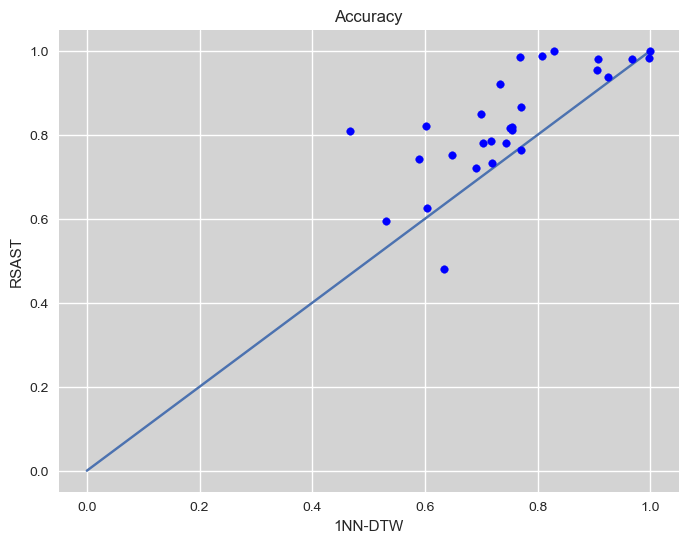

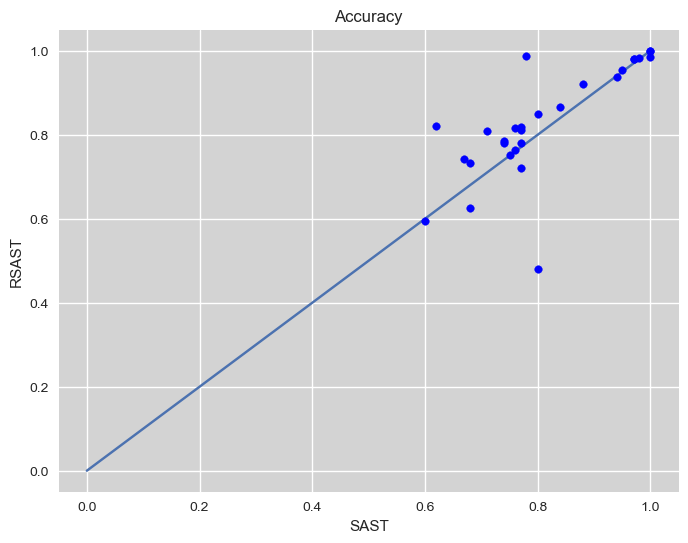

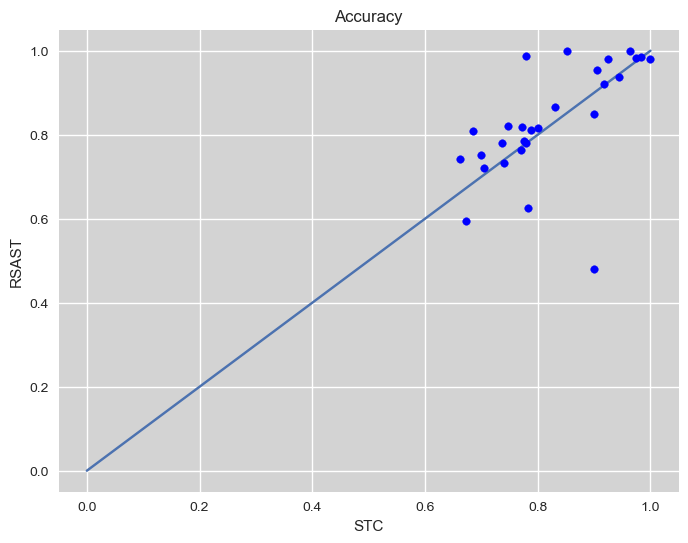

In [43]:
delete_files_in_directory("ExperimentationRSAST/images_one_vs_one_comparison/")
for method in score_by_method.columns.drop(hyperparameter):
    y=score_by_method[hyperparameter]
    x=score_by_method[method]

    # set the style of the plot
    plt.style.use('seaborn')

    # create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the line
    ax.plot([0,1], [0,1])

    # plot the points
    ax.scatter(x, y, color='blue', edgecolor='blue', s=30, zorder=10)

    # add labels and title
    ax.set_ylabel(hyperparameter)
    ax.set_xlabel(method)
    ax.set_title('Accuracy')


    # set the background color
    ax.set_facecolor('lightgrey')
    plt.savefig('ExperimentationRSAST/images_one_vs_one_comparison/'+hyperparameter+'vs'+method+'.png')


In [44]:
# create a pivot table with the mean of time by hyperparameter
time_per_method=pd.pivot_table(df_result, values='time', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')/60
time_per_method

classifier_name,RSAST
dataset_name,
ACSF1,76.067852
Adiac,0.404516
AllGestureWiimoteX,1.693926
AllGestureWiimoteY,1.599983
AllGestureWiimoteZ,1.646046
...,...
Herring,0.395759
MelbournePedestrian,0.019043
PLAID,71.267501


#### Generate CD Diagram comparison

In [45]:
concatenated_df.classifier_name.unique()

array(['1NN-DTW', 'STC', 'SAST', 'RSAST'], dtype=object)

In [48]:


df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
draw_cd_diagram(df_perf, labels=True, fname='ExperimentationRSAST/images_cd_diagram/cd-diagram_overall_comparison_other_method.png')


{0: '1NN-DTW', 1: 'SAST', 2: 'STC', 3: 'RSAST'}
[2, 1]
[2, 3]


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [49]:
df_perf["classifier_name"].unique()

array(['1NN-DTW', 'RSAST', 'SAST', 'STC'], dtype=object)

In [50]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,0
1NN-DTW,3.517857
SAST,2.482143
STC,2.339286
RSAST,1.660714


In [52]:
uca_ds=pd.read_excel("ExperimentationRSAST/DataSetsUCLASummary.xlsx")

uca_ds.columns

Index(['USED SAST', 'BAKE OFF', 'N RUNS S17_S16_HT', 'N RUNS S17_SAST_DS',
       'N RUNS S17_SAST_DS_all', 'N RUNS S17_SAST_DS_extra_1',
       'N RUNS S17_SAST_DS_extra_2', 'N RUNS S17_OTHER_DEFAULT_SPLIT',
       'N RUNS S17_RSAST_R10', 'N RUNS S17_OTHER_R10', 'ID', 'Name', 'Type',
       'Train ', 'Test ', 'Class', 'Length', 'RSAST (10,10) WORST SAST?',
       'O(|c|nm²)', 'O(|c|nm³)', 'Approx Time (hours)', 'L25', 'L50', 'L75',
       'ED (w=0)', 'DTW (learned_w) ', 'DTW (w=100)', 'Default rate',
       'Data donor/editor', '50/L', 'Unnamed: 30'],
      dtype='object')

In [53]:
concatenated_df=concatenated_df.merge(uca_ds, left_on=['dataset_name'],right_on=['Name'])
concatenated_df.columns

Index(['dataset_name', 'accuracy', 'classifier_name', 'time', 'USED SAST',
       'BAKE OFF', 'N RUNS S17_S16_HT', 'N RUNS S17_SAST_DS',
       'N RUNS S17_SAST_DS_all', 'N RUNS S17_SAST_DS_extra_1',
       'N RUNS S17_SAST_DS_extra_2', 'N RUNS S17_OTHER_DEFAULT_SPLIT',
       'N RUNS S17_RSAST_R10', 'N RUNS S17_OTHER_R10', 'ID', 'Name', 'Type',
       'Train ', 'Test ', 'Class', 'Length', 'RSAST (10,10) WORST SAST?',
       'O(|c|nm²)', 'O(|c|nm³)', 'Approx Time (hours)', 'L25', 'L50', 'L75',
       'ED (w=0)', 'DTW (learned_w) ', 'DTW (w=100)', 'Default rate',
       'Data donor/editor', '50/L', 'Unnamed: 30'],
      dtype='object')

In [54]:
acc_per_type=pd.pivot_table(concatenated_df, values="accuracy", index=["dataset_name","Type",'classifier_name'])
#acc_per_type=concatenated_df
acc_per_type=acc_per_type.reset_index()

In [55]:
max_bx=max(acc_per_type.accuracy)
min_bx=min(acc_per_type.accuracy)


#df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name','classifier_name'], columns=['rpoint'],values='accuracy')
#df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])

#print(df_to_cd.head(5))

# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=acc_per_type, y='Type', x='accuracy', hue ='classifier_name')
#plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

#plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
#print(df_to_cd.describe())
plt.tight_layout()
# save plot
plt.savefig('ExperimentationRSAST/images_boxplot_acc_per_type/boxplot_acc_per_type.png')

In [56]:
pd.pivot_table(acc_per_type,index='Type', aggfunc=lambda x: len(x.unique()))

,accuracy,classifier_name,dataset_name
Type,,,
Device,4,4,1
ECG,12,4,3
Image,46,4,13
Motion,14,4,4
Sensor,12,4,3
Simulated,4,4,1
Spectro,10,4,3
